In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('C:/Users/AJ/Documents/Workspace/Projects/Practice Proj/Earning/adult_treated.csv')
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earnings
0,36984,26,1,63234,1,13,1,1,1,1,0,4508,0,12,United-States,0
1,45274,40,1,83508,1,13,1,1,1,1,0,0,0,20,United-States,0
2,47350,38,1,65291,1,13,1,1,1,1,0,0,0,24,United-States,0
3,23517,41,1,306405,2,10,1,1,1,1,0,0,0,40,United-States,0
4,28312,28,1,204734,2,10,1,1,1,1,0,0,0,40,United-States,0


In [19]:
nData = data.loc[:, ['age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'earnings']]
nData.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,earnings
0,26,1,63234,1,13,1,1,1,1,0,4508,0,12,0
1,40,1,83508,1,13,1,1,1,1,0,0,0,20,0
2,38,1,65291,1,13,1,1,1,1,0,0,0,24,0
3,41,1,306405,2,10,1,1,1,1,0,0,0,40,0
4,28,1,204734,2,10,1,1,1,1,0,0,0,40,0


In [21]:
nData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45609.0,38.602710,13.210876,17.0,28.0,37.0,47.0,90.0
workclass,45609.0,1.743713,1.465750,1.0,1.0,1.0,2.0,7.0
fnlwgt,45609.0,189780.438356,105585.229779,13492.0,117567.0,178319.0,237848.0,1490400.0
education,45609.0,4.386853,3.445565,1.0,2.0,4.0,5.0,16.0
education_num,45609.0,10.140849,2.553339,1.0,9.0,10.0,13.0,16.0
marital_status,45609.0,2.055384,1.174893,1.0,1.0,2.0,3.0,7.0
occupation,45609.0,5.729089,2.976501,1.0,3.0,5.0,8.0,14.0
relationship,45609.0,3.395953,1.225680,1.0,3.0,3.0,4.0,6.0
race,45609.0,1.432086,1.187458,1.0,1.0,1.0,1.0,5.0
sex,45609.0,0.676182,0.467937,0.0,0.0,1.0,1.0,1.0


In [22]:
# Identifying and removing outliers

outliers = nData.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

# fit the model
model = LogisticRegression()
model.fit(inputX, outputY)
print()

# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('The mean absolute error (MAE) is: %.3f' % mae)

(45609, 13) (45609,)
outliers:  1808
(43801, 13) (43801,)

The mean absolute error (MAE) is: 0.779


In [25]:
xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

adult = pd.concat([xDf, yDf], axis= 1)
adult.columns = ['age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'earnings']
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,earnings
0,26,1,63234,1,13,1,1,1,1,0,4508,0,12,0
1,40,1,83508,1,13,1,1,1,1,0,0,0,20,0
2,38,1,65291,1,13,1,1,1,1,0,0,0,24,0
3,41,1,306405,2,10,1,1,1,1,0,0,0,40,0
4,28,1,204734,2,10,1,1,1,1,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43796,34,3,337995,1,13,2,5,6,5,1,15020,0,50,1
43797,42,5,267252,11,14,4,5,6,5,1,0,0,45,1
43798,47,4,55377,1,13,3,9,6,5,1,0,0,40,1
43799,58,1,219504,10,8,2,11,6,5,1,0,0,45,1


# Feature Selection

In [32]:
# Tuning for the best possible number of features to select

sAdult = adult.values
a = sAdult[:, :-1]
b = sAdult[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 14):
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))

for 2 features, Mean Absolute Error is: -24.5, Std is: 0.000
for 3 features, Mean Absolute Error is: -18.2, Std is: 0.004
for 4 features, Mean Absolute Error is: -18.2, Std is: 0.004
for 5 features, Mean Absolute Error is: -18.3, Std is: 0.005
for 6 features, Mean Absolute Error is: -18.5, Std is: 0.005
for 7 features, Mean Absolute Error is: -18.4, Std is: 0.005
for 8 features, Mean Absolute Error is: -18.3, Std is: 0.004
for 9 features, Mean Absolute Error is: -18.2, Std is: 0.004
for 10 features, Mean Absolute Error is: -18.3, Std is: 0.005
for 11 features, Mean Absolute Error is: -18.5, Std is: 0.005
for 12 features, Mean Absolute Error is: -17.2, Std is: 0.004
for 13 features, Mean Absolute Error is: -21.0, Std is: 0.006


In [27]:
# Identfying the algorithm that would select feature better

fAdult = adult.values
c = fAdult[:, :-1]
d = fAdult[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    
    # linear regression
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=12) 
    models['Logistic regression'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    model = Perceptron()
    rfe = RFE(model, n_features_to_select=12)
    models['Perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # decision tree
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select=12) 
    models['Decision tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # random forest
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=12)
    models['Random forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gradient boosting 
    model = GradientBoostingClassifier()
    rfe = RFE(model, n_features_to_select=12) 
    models['Gradient boosting'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, c, d):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, c, d, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, c, d)
    results.append(scores)
    names.append(name)
    print('%s algorithm has %.3f Mean and a Std of %.3f' % (name, mean(scores)*100, std(scores)))


Logistic regression algorithm has -17.151 Mean and a Std of 0.004
Perceptron algorithm has -28.251 Mean and a Std of 0.164
Decision tree algorithm has -19.532 Mean and a Std of 0.005
Random forest algorithm has -15.128 Mean and a Std of 0.005
Gradient boosting algorithm has -13.989 Mean and a Std of 0.004


In [29]:
sAdult12= adult.values
e = sAdult12[:, 0:-1]
f = sAdult12[:, -1]

# feature extraction
model = GradientBoostingClassifier()

rfe = RFE(model, n_features_to_select=12)
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
fit = rfe.fit(e, f)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(pipeline, e, f, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f '  %  (mean(nScores)))
print()
print('Standard Deviation Accuracy: %.3f' % std(nScores))
print()
print('Selected Features: {}'.format(fit.n_features_))

Mean Absolute Error: -0.140 

Standard Deviation Accuracy: 0.004

Selected Features: 12


In [30]:
# identifying the features that were selected

features = rfe.transform(e)

iAdult = pd.DataFrame(features)
iAdult.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# to make it look organised when returning 
adultCol = dict()
cols = list(adult.columns)[0:-1] # the list of columns in your data
for col in cols:
    adultCol[col]= adult[col].values.tolist()
    
collen = len(iAdult.columns.tolist())
counter = 0
while counter < collen:
    colLabel = ''
    if counter == 0:
        colLabel = 'a'
    elif counter == 1:
        colLabel = 'b'
    elif counter == 2:
        colLabel = 'c'
    elif counter == 3:
        colLabel = 'd'  
    elif counter == 4:
        colLabel = 'e'
    elif counter == 5:
        colLabel = 'f'
    elif counter == 6:
        colLabel = 'g'
    elif counter == 7:
        colLabel = 'h'
    elif counter == 8:
        colLabel = 'i'
    elif counter == 9:
        colLabel = 'j'
    elif counter == 10:
        colLabel = 'k'
    elif counter == 11:
        colLabel = 'l'
    else:
        pass
    colData = iAdult.loc[:,colLabel]
    colDataVals = list(colData.values)
    for item in adultCol.items():
        if colDataVals == item[1]:
            print('Label is: ', item[0])
    counter+=1
print()
# end of organisation

print('The selected features are: ')
iAdult.head(10)

Label is:  age
Label is:  workclass
Label is:  fnlwgt
Label is:  education_num
Label is:  marital_status
Label is:  occupation
Label is:  relationship
Label is:  race
Label is:  sex
Label is:  capital_gain
Label is:  capital_loss
Label is:  hours_per_week

The selected features are: 


,a,b,c,d,e,f,g,h,i,j,k,l
0,26,1,63234,13,1,1,1,1,0,4508,0,12
1,40,1,83508,13,1,1,1,1,0,0,0,20
2,38,1,65291,13,1,1,1,1,0,0,0,24
3,41,1,306405,10,1,1,1,1,0,0,0,40
4,28,1,204734,10,1,1,1,1,0,0,0,40
5,37,1,177895,10,1,1,1,1,0,5013,0,40
6,37,1,211168,10,1,1,1,1,0,0,0,35
7,29,1,251526,10,1,1,1,1,0,0,0,20
8,29,1,108706,10,1,1,1,1,0,0,0,40
9,22,1,366139,10,1,1,1,1,0,0,0,40


In [34]:
sAdult = adult.loc[:, ['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation', 'relationship',
       'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'earnings']]
sAdult

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,earnings
0,26,1,63234,13,1,1,1,1,0,4508,0,12,0
1,40,1,83508,13,1,1,1,1,0,0,0,20,0
2,38,1,65291,13,1,1,1,1,0,0,0,24,0
3,41,1,306405,10,1,1,1,1,0,0,0,40,0
4,28,1,204734,10,1,1,1,1,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43796,34,3,337995,13,2,5,6,5,1,15020,0,50,1
43797,42,5,267252,14,4,5,6,5,1,0,0,45,1
43798,47,4,55377,13,3,9,6,5,1,0,0,40,1
43799,58,1,219504,8,2,11,6,5,1,0,0,45,1


In [35]:
sAdult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43801.0,38.503048,13.147788,17.0,28.0,37.0,47.0,90.0
workclass,43801.0,1.740097,1.464927,1.0,1.0,1.0,2.0,7.0
fnlwgt,43801.0,188220.954681,103028.954396,19214.0,117674.0,177578.0,234537.0,1097453.0
education_num,43801.0,10.125180,2.545471,1.0,9.0,10.0,13.0,16.0
marital_status,43801.0,2.055821,1.173339,1.0,1.0,2.0,3.0,7.0
occupation,43801.0,5.730417,2.977889,1.0,3.0,5.0,8.0,14.0
relationship,43801.0,3.392845,1.225447,1.0,3.0,3.0,4.0,6.0
race,43801.0,1.432433,1.188129,1.0,1.0,1.0,1.0,5.0
sex,43801.0,0.675236,0.468292,0.0,0.0,1.0,1.0,1.0
capital_gain,43801.0,1040.900368,7532.089451,0.0,0.0,0.0,0.0,99999.0


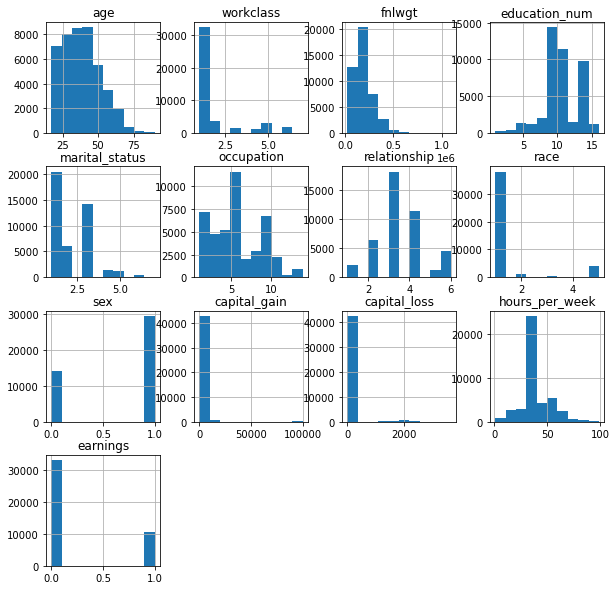

In [37]:
sAdult.hist()
plt.gcf().set_size_inches(10,10)
plt.show()

# Data Transformation

In [36]:
# rescaling the data
rescale = sAdult.values
g= rescale[:, 0:-1]
h= rescale[:, -1]

scaler = MinMaxScaler(feature_range=(0,1))
resc = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rAdult = pd.DataFrame(resc)
rAdult.columns = ['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation', 'relationship',
       'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']

# adding back the target output feature
rAdult['earnings'] = sAdult['earnings']
rAdult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43801.0,0.294562,0.180107,0.0,0.150685,0.273973,0.410959,1.0
workclass,43801.0,0.123350,0.244154,0.0,0.000000,0.000000,0.166667,1.0
fnlwgt,43801.0,0.156743,0.095553,0.0,0.091316,0.146873,0.199699,1.0
education_num,43801.0,0.608345,0.169698,0.0,0.533333,0.600000,0.800000,1.0
marital_status,43801.0,0.175970,0.195556,0.0,0.000000,0.166667,0.333333,1.0
occupation,43801.0,0.363878,0.229068,0.0,0.153846,0.307692,0.538462,1.0
relationship,43801.0,0.478569,0.245089,0.0,0.400000,0.400000,0.600000,1.0
race,43801.0,0.108108,0.297032,0.0,0.000000,0.000000,0.000000,1.0
sex,43801.0,0.675236,0.468292,0.0,0.000000,1.000000,1.000000,1.0
capital_gain,43801.0,0.010409,0.075322,0.0,0.000000,0.000000,0.000000,1.0


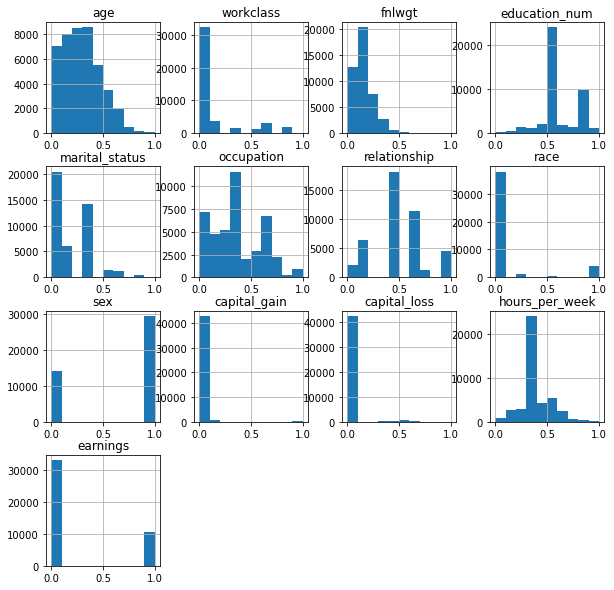

In [38]:
rAdult.hist()
plt.gcf().set_size_inches(10,10)
plt.show()

In [40]:
# Normalizing the data

normalize = rAdult.values
i = normalize[:, 0:-1]
j = normalize[:, -1]

nScaler = Normalizer()
norm = nScaler.fit_transform(i)
set_printoptions(precision=3)

# put transformed data into dataframe and display
nAdult = pd.DataFrame(norm)
nAdult.columns = ['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation', 'relationship',
       'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']

# adding back the target output feature
nAdult['earnings'] = rAdult['earnings']
nAdult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43801.0,0.203333,0.122851,0.0,0.106450,0.190206,0.282796,0.831512
workclass,43801.0,0.078081,0.153703,0.0,0.000000,0.000000,0.100020,0.783543
fnlwgt,43801.0,0.111851,0.070279,0.0,0.064188,0.101659,0.144845,0.748031
education_num,43801.0,0.432758,0.132991,0.0,0.356409,0.417862,0.515512,0.976265
marital_status,43801.0,0.128525,0.143793,0.0,0.000000,0.103021,0.232308,0.867078
occupation,43801.0,0.253713,0.155640,0.0,0.137267,0.226594,0.373563,0.849913
relationship,43801.0,0.329992,0.166042,0.0,0.242490,0.286238,0.417422,0.895451
race,43801.0,0.064951,0.177241,0.0,0.000000,0.000000,0.000000,0.896779
sex,43801.0,0.445937,0.314815,0.0,0.000000,0.614189,0.686397,0.894390
capital_gain,43801.0,0.006351,0.042054,0.0,0.000000,0.000000,0.000000,0.740595


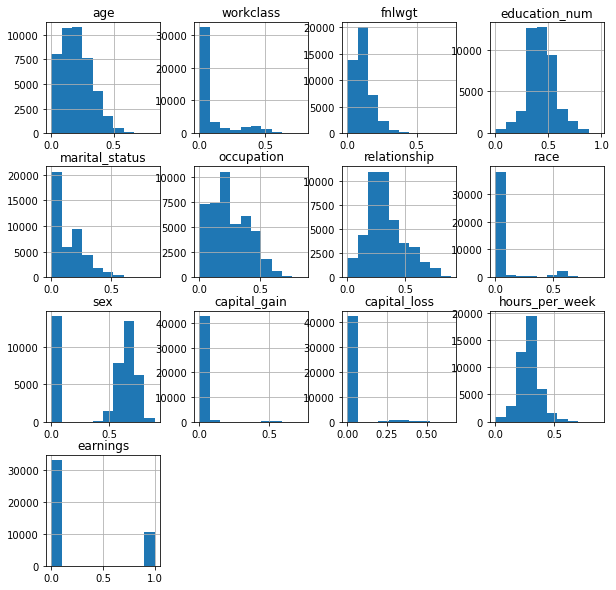

In [42]:
nAdult.hist()
plt.gcf().set_size_inches(10,10)
plt.show()

In [43]:
# testing for accuracy of the selected features with GradientBoostingClassifier

tAdult = nAdult.values
x = tAdult[:, 0:-1]
y = tAdult[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = GradientBoostingClassifier()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('The accuracy of the selected features for modeling is: %.2f' % (accuracy*100))

The accuracy of the selected features for modeling is: 84.58
